In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
P = 22696.8 # N/m^2
gamma = 1.4
M_0 = 0.85
q = gamma/2*P*M_0**2
print('q (N/m^2) = ',q)

S_W = 285
W_TO = 1645842 #N
W = 0.8*W_TO
L = W
C_L = L/(q*S_W)
C_D = 0.056*C_L**2-0.004*C_L+0.014

D = C_D*q*S_W
print('Drag (N) = ',D)

q (N/m^2) =  11478.906599999998
Drag (N) =  70209.70138143492


In [8]:
def EngineIdeal(bypass,fpr,cpr):
    # Fan (Compressor)

    # Station 1: Fan Inlet
    # Station 2: Fan Outlet

    polyf = 1
    gammac = 1.4
    Mo = 0.85
    intakeefficiency = 1

    nfan = (gammac-1)/(gammac*polyf)

    # To1 = T1

    T0 = 216.78 # K

    To2 = T0*(1+((gammac-1)/2)*Mo**2)

    To13 = To2*(fpr**((gamma-1)/gamma))

    p2 = 22696.8/100000

    po2 = p2*(1+intakeefficiency*((gammac-1)/2)*Mo**2)**(gammac/(gammac-1))

    po13 = po2*fpr

    # Compressor

    # Station 3: Compressor Outlet

    polyc = 1

    #ncompressor = (gammac-1)/(gammac*polyc)
    ncompressor = 1

    #To3 = To13*((cpr**ncompressor)-1)+To13
    To3 = cpr**((gamma-1)/gamma)*To13

    po3 = po13*cpr

    # Burner

    # Station 4: Burner Outlet

    bpr = 0.96
    To4 = 1560 # K

    po4 = po3

    # HPT

    # Station 5: HPT Outlet

    cpa = 1.005
    cpg = 1.148

    polyt = 1
    gammah = 1.33

    mecheff = 1

    To45 = To4-((cpa/(cpg))*(To3-To13))

    # mass flow rates
    F = D
    R = 287
    C_a = M_0*np.sqrt(gamma*R*T0)
    mdot_mdoth = bypass+1

    # LPT

    # Station 6: LPT Outlet

    To5 = To45-mdot_mdoth*cpa/cpg*(To13-To2)

    #To6 = To5-((cpa/(mecheff*cpg))*(To2-To1))

    po5 = po4*((To5/To4)**(gammah/(gammah-1)))

    # Turbine Nozzle

    # Station 9: Nozzle Outlet

    nj = 1

    T9 = To5-(nj*To5*(1-((p2/po5)**((gammah-1)/gammah))))

    po9 = p2*((To5/T9)**(gammah/(gammah-1)))

    p19 = p2
    M19 = np.sqrt((((po13/p19)**((gammah-1)/gammah))-1)*(2/(gammah-1)))
    T19 = To13/(1+(gamma-1)/2*M19**2)

    C19 = M19*np.sqrt(gamma*287*T19)

    p9 = p2
    p19 = p2


    M9 = np.sqrt((((po5/p2)**((gammah-1)/gammah))-1)*(2/(gammah-1)))

    # Station 9: Nozzle Outlet

    T9 = To5/(1+(gammah-1)/2*M9**2)

    C9 = M9*np.sqrt(gammah*287*T9)

    hfuel = 43100 # kJ/kg
    
    fideal = ((cpg*To3)-(cpa*To2))/((hfuel)-(cpg*To3))
    
    Ca = Mo*np.sqrt(gammac*287*T0)
    
    F = D
    a_0 = np.sqrt(gamma*R*T0)
    C0 = M_0*a_0
    mdot = F/(10/11*C19+1/11*C9-C0)
    
    nTideal = (cpa*(T9-T0))/(fideal*hfuel)
    nP = 2/((C9/Ca)+1)
    nOideal = nTideal*nP
    
    TSFCideal = Ca/(nOideal*hfuel)
    
    fmnot = F/mdot

    return np.array([fmnot,TSFCideal,fideal,fideal,nTideal,nP,nOideal])

In [9]:
# Fan (Compressor)

def EngineReal(bypass,fpr,cpr):
    # Fan (Compressor)

    # Station 1: Fan Inlet
    # Station 2: Fan Outlet

    polyf = 0.89
    gammac = 1.4
    Mo = 0.85
    intakeefficiency = 0.98

    nfan = (gammac-1)/(gammac*polyf)

    T1 = 216.78 # K

    To1 = T1*(1+((gammac-1)/2)*Mo**2)

    To2 = To1*((fpr**nfan)-1)+To1

    p1 = 22696.8/100000

    po1 = p1*(1+intakeefficiency*((gammac-1)/2)*Mo**2)**(gammac/(gammac-1))

    po2 = po1*fpr
    
    # Fan Nozzle

    # Station 19: Fan Nozzle Outlet

    nj = 0.99
    To19 = To2
    po19 = po2
    p19 = p1

    T19 = To19-(nj*To19*(1-(p19/po19)**((gammac-1)/gammac)))
    
    M19 = np.sqrt((((po19/p19)**((gammac-1)/gammac))-1)*(2/(gammac-1)))

    C19 = M19*np.sqrt(gammac*287*T19)

    # Compressor

    # Station 3: Compressor Outlet

    polyc = 0.90

    ncompressor = (gammac-1)/(gammac*polyc)

    To3 = To2*((cpr**ncompressor)-1)+To2

    po3 = po2*cpr

    # Burner

    # Station 4: Burner Outlet

    bpr = 0.96
    To4 = 1560 # K

    po4 = po3*bpr

    # HPT

    # Station 5: HPT Outlet

    cpa = 1.004
    cpg = 1.148

    polyt = 0.90
    gammah = 1.33

    mecheff = 0.99

    To5 = To4-((cpa/(mecheff*cpg))*(To3-To2))

    m = polyt*((gammah-1)/gammah)

    po5 = po4*((To5/To4)**(1/m))
    
    # LPT

    # Station 6: LPT Outlet

    To6 = To5-(bypass+1)*((cpa/(mecheff*cpg))*(To2-To1))

    #To6 = To5-((cpa/(mecheff*cpg))*(To2-To1))

    po6 = po5*((To6/To5)**(1/m))
    
    # Turbine Nozzle

    # Station 9: Nozzle Outlet

    T9 = To6-(nj*To6*(1-((p1/po6)**((gammah-1)/gammah))))

    po9 = p1*((To6/T9)**(gammah/(gammah-1)))
    
    p9 = p1

    M9 = np.sqrt((((po9/p9)**((gammah-1)/gammah))-1)*(2/(gammah-1)))

    C9 = M9*np.sqrt(gammah*287*T9)
    
    F = D

    mdot = F/(((bypass*C19)/(bypass+1))+(C9/(bypass+1)))
    
    hfuel = 43100 # kJ/kg
    nb = 0.99
    
    factual = ((cpg*To3)-(cpa*To2))/((nb*(hfuel)-(cpg*To3)))
    
    Ca = Mo*np.sqrt(gammac*287*T1)
    
    # Cj = C9
    
    nTactual = (cpa*(T9-T1))/(factual*hfuel)
    nP = 2/((C9/Ca)+1)
    nOactual = nTactual*nP
    
    TSFCactual = Ca/(nOactual*hfuel)
    
    fmnot = F/mdot
    
    return np.array([fmnot,TSFCactual,factual,nTactual,nP,nOactual])

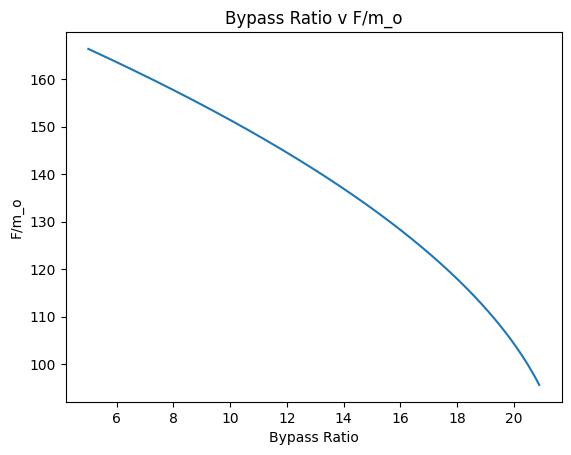

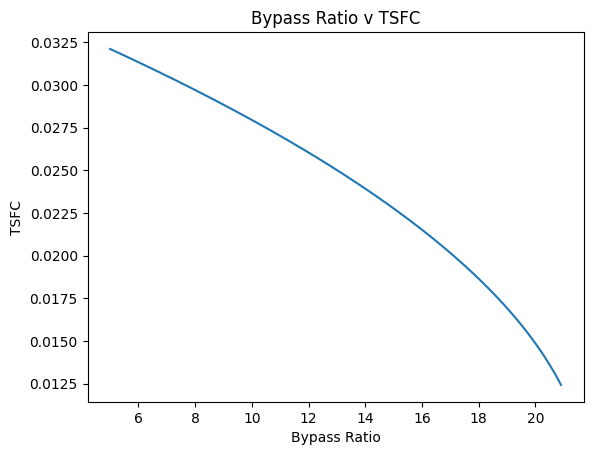

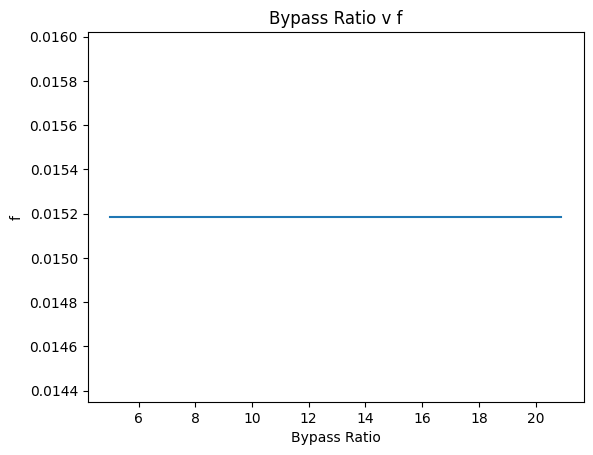

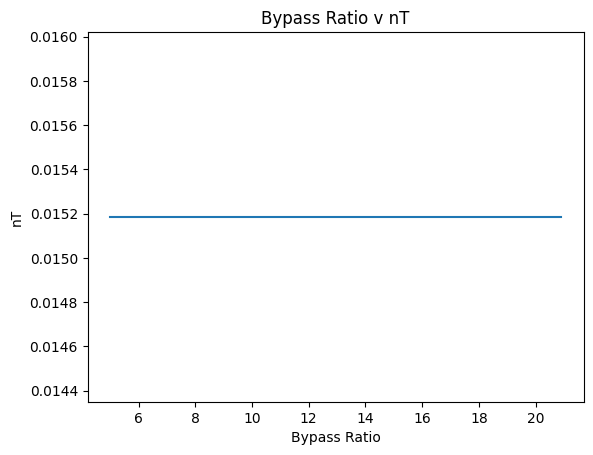

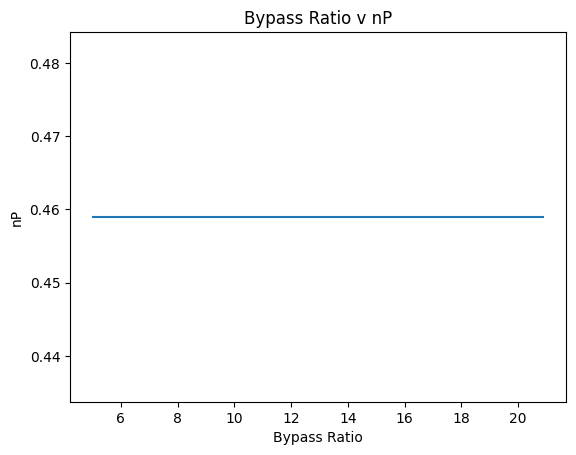

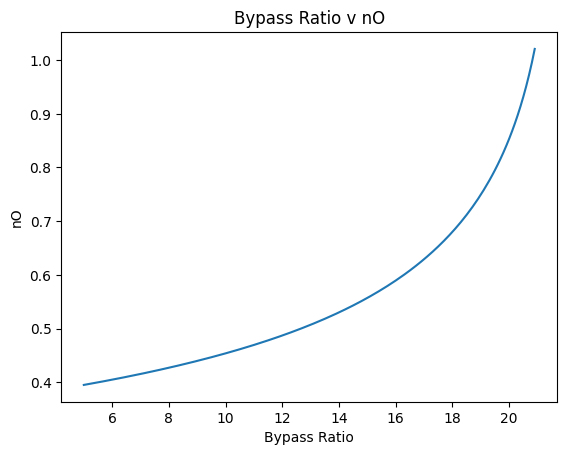

IndexError: index 6 is out of bounds for axis 0 with size 6

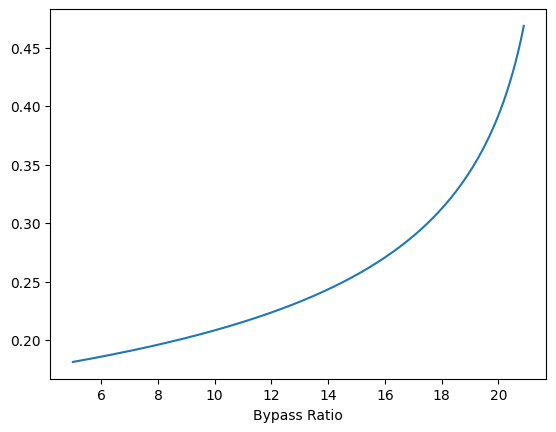

In [10]:
bypassratios = np.arange(5.1,21,0.1)
fpr = 1.5
cpr = 36

bypassvariedresultsideal = np.array(EngineIdeal(5,fpr,cpr))

for i in bypassratios:
    bypassvariedresultsideal = np.vstack((bypassvariedresultsideal,EngineIdeal(i,fpr,cpr)))

bypassratios = np.arange(5,21,0.1)

it = 0

names = np.array(['F/m_o','TSFC','f','nT','nP','nO'])

while it < 10:
    plt.plot(bypassratios,bypassvariedresultsideal[:,it])
    plt.xlabel('Bypass Ratio')
    plt.ylabel(names[it])
    plt.title('Bypass Ratio v '+names[it])
    plt.show()
    
    it += 1

C:\Users\there\AppData\Local\Temp\ipykernel_5544\1532593282.py:102: RuntimeWarning: invalid value encountered in sqrt
  M9 = np.sqrt((((po9/p9)**((gammah-1)/gammah))-1)*(2/(gammah-1)))
C:\Users\there\AppData\Local\Temp\ipykernel_5544\1532593282.py:90: RuntimeWarning: invalid value encountered in scalar power
  po6 = po5*((To6/To5)**(1/m))


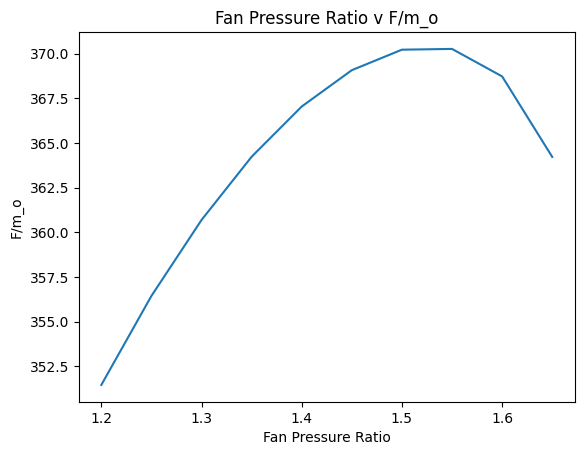

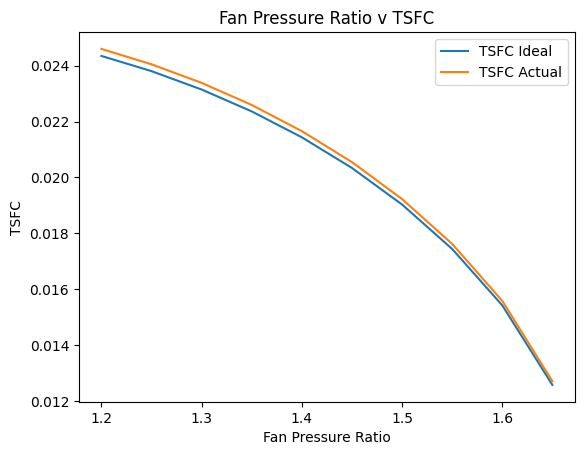

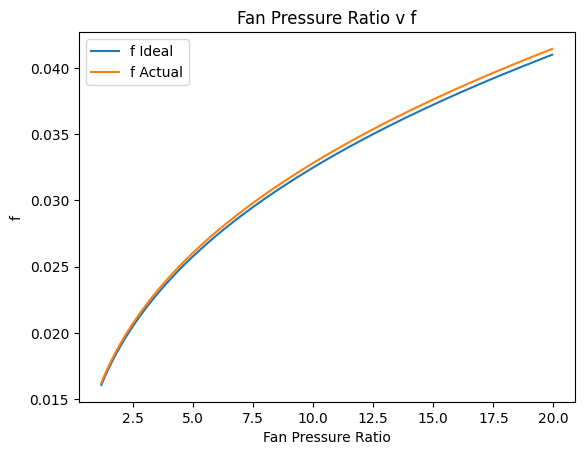

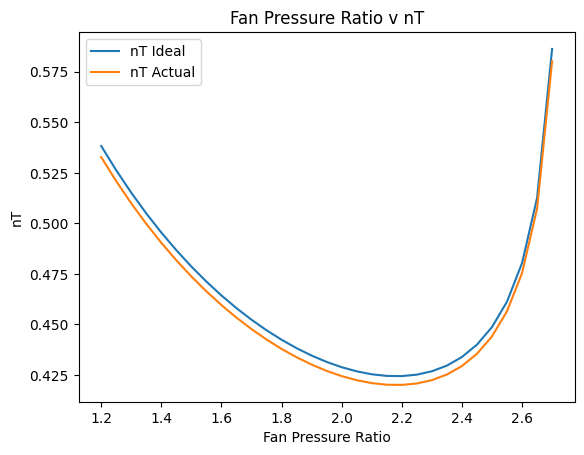

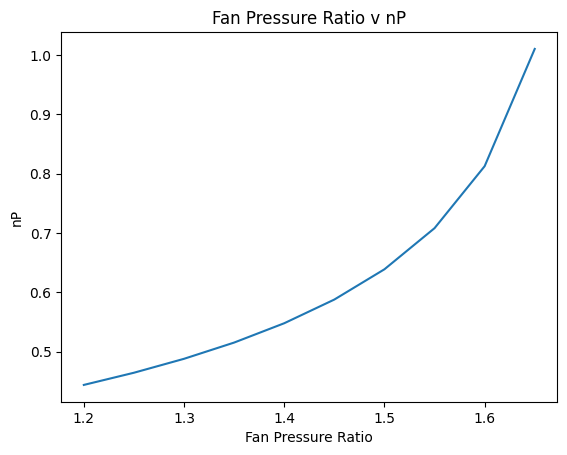

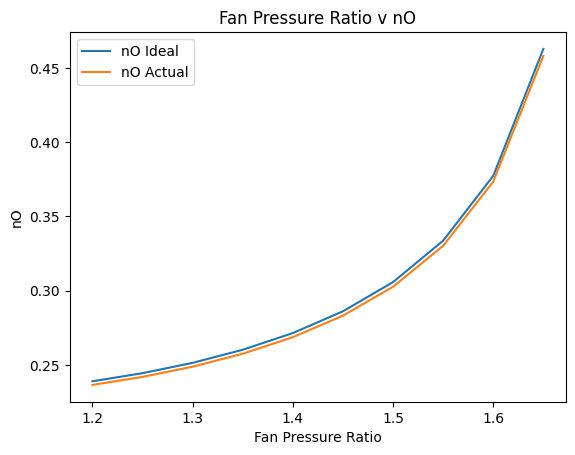

In [ ]:
bpr = 10
fpr = np.arange(1.25,20,0.05)
cpr = 36

fprresults = np.array(Engine(bpr,1.2,cpr))

for i in fpr:
    fprresults = np.vstack((fprresults,Engine(bpr,i,cpr)))

fpr = np.arange(1.2,20,0.05)

it = 0

names = np.array(['F/m_o','TSFC Ideal','TSFC Actual','f Ideal','f Actual','nT Ideal','nT Actual','nP','nO Ideal','nO Actual'])
names2 = np.array(['F/m_o','TSFC','TSFC','f','f','nT','nT','nP','nO','nO'])

while it < 10:
    if it == 1 or it == 3 or it == 5 or it == 8:
        plt.plot(fpr,fprresults[:,it],'-',fpr,fprresults[:,it+1],'-')
        plt.xlabel('Fan Pressure Ratio')
        plt.ylabel(names2[it])
        plt.legend([names[it],names[it+1]])
        plt.title('Fan Pressure Ratio v '+names2[it])
        plt.show()
        
        it += 2
    else:
        plt.plot(fpr,fprresults[:,it])
        plt.xlabel('Fan Pressure Ratio')
        plt.ylabel(names[it])
        plt.title('Fan Pressure Ratio v '+names[it])
        plt.show()
    
        it += 1

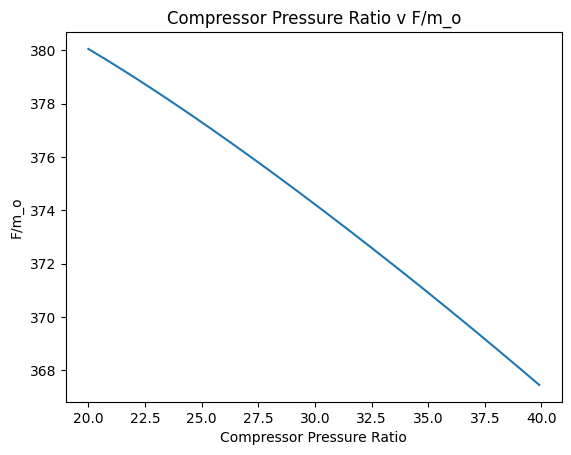

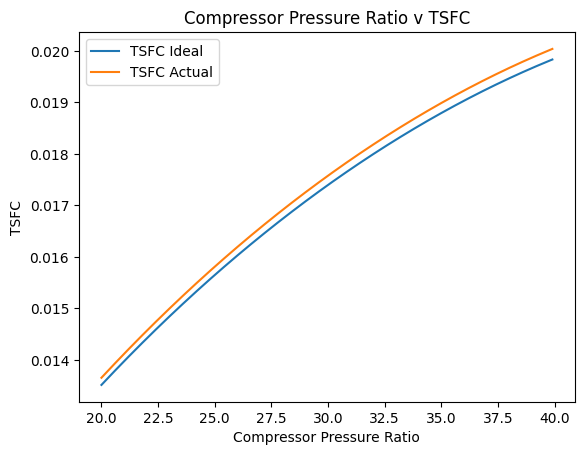

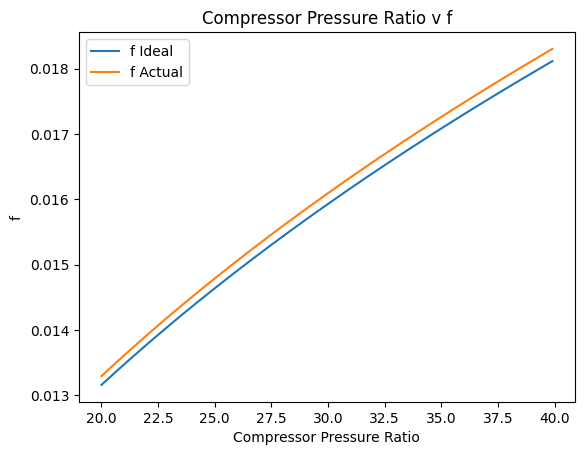

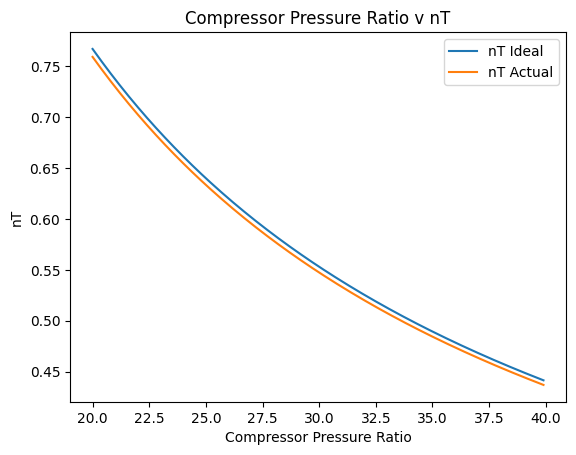

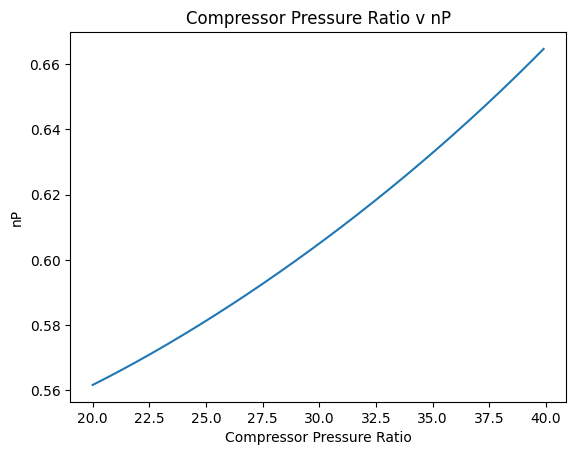

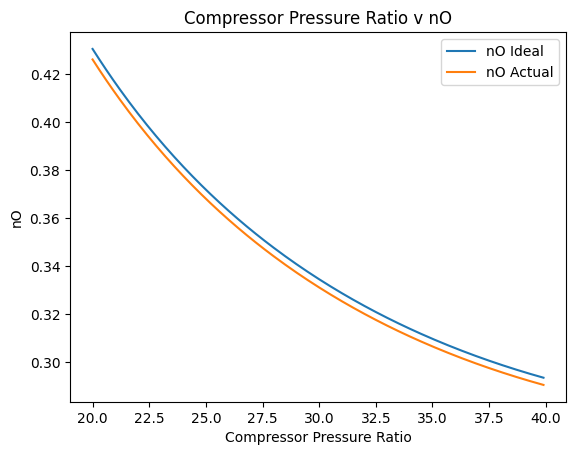

In [ ]:
bpr = 10
fpr = 1.5
cpr = np.arange(20.1,40,0.1)

cprresults = np.array(Engine(bpr,fpr,20))

for i in cpr:
    cprresults = np.vstack((cprresults,Engine(bpr,fpr,i)))

cpr = np.arange(20,40,0.1)

it = 0

names = np.array(['F/m_o','TSFC Ideal','TSFC Actual','f Ideal','f Actual','nT Ideal','nT Actual','nP','nO Ideal','nO Actual'])
names2 = np.array(['F/m_o','TSFC','TSFC','f','f','nT','nT','nP','nO','nO'])

while it < 10:
    if it == 1 or it == 3 or it == 5 or it == 8:
        plt.plot(cpr,cprresults[:,it],'-',cpr,cprresults[:,it+1],'-')
        plt.xlabel('Compressor Pressure Ratio')
        plt.ylabel(names2[it])
        plt.legend([names[it],names[it+1]])
        plt.title('Compressor Pressure Ratio v '+names2[it])
        plt.show()
        
        it += 2
    else:
        plt.plot(cpr,cprresults[:,it])
        plt.xlabel('Compressor Pressure Ratio')
        plt.ylabel(names[it])
        plt.title('Compressor Pressure Ratio v '+names[it])
        plt.show()
    
        it += 1